In [1]:
%matplotlib inline
#Amitava Chakraborty - 06th Jan 2018
#Preliminaries
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit import BasicAer
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.visualization import plot_histogram

q_simulator = BasicAer.get_backend('qasm_simulator')
s_simulator = BasicAer.get_backend('statevector_simulator')

# Preparaing Circuit

In [2]:
#Creating Registers
#One qubit size register, named as q0
q0 = QuantumRegister(1, 'q0')
#One cbit size register
c0 = ClassicalRegister(1, 'c0')
#Two qubit size register
q1 = QuantumRegister(2, 'q1')
#Two cbit size register
c1 = ClassicalRegister(2, 'c1')

In [3]:
print(q0.name) ; print (q0.size)
print(q1.name, q1.size)

q0
1
q1 2


In [5]:
#Test if the register are the same or different.
q_test = QuantumRegister(1, 'q2')
print(q0==q_test)
q_test = QuantumRegister(2, 'q0')
print(q0==q_test)
print(q0==q1)

False
False
False


# Creating Circuits

In [10]:
#Quantum Circuits are made using registers - 
#either when initiated or by using the add_register command.
circ = QuantumCircuit(q0, q1)
circ.x(q0[0])
circ.x(q1[0])
circ.draw(output='mpl')
#You must not write anything after circuit drawing, otherwise it cannot draw
#To see the drawing - remove the following comments
#Or this way
"""
circ2 = QuantumCircuit()
circ2.add_register(q0)
circ2.add_register(q1)
circ2.x(q0[1])
circ2.x(q1[0])
circ2.draw(output='mpl')
"""

"\ncirc2 = QuantumCircuit()\ncirc2.add_register(q0)\ncirc2.add_register(q1)\ncirc2.x(q0[1])\ncirc2.x(q1[0])\ncirc2.draw(output='mpl')\n"

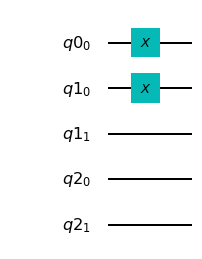

In [11]:
from copy import deepcopy
q2 = QuantumRegister(2, 'q2')
#Copy the entire circuit circ into circ3
circ2 = deepcopy(circ)
#Add the new register into the new circuit
circ2.add_register(q2)
circ2.draw(output='mpl')

#The circuit drawer has the last register added at the bottom and 
#if we add a new register it will add it to the bottom of the circuit.

In [12]:
#Circuits can also be created without predefined registers. 
#Instead, you can supply the the number of qubits (required) and 
#the number of classical bits (optional) to QuantumCircuit().
num_qubits = 3;
num_bits   = 2;
qc = QuantumCircuit(num_qubits, num_bits)
#With this syntax, registers are created automatically and 
#can be accessed as properties of the QuantumCircuit.
print(qc.qregs)
print(qc.cregs)

[QuantumRegister(3, 'q')]
[ClassicalRegister(2, 'c')]


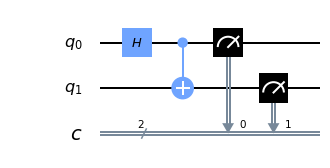

In [13]:
#Qubits and bits can be indexed directly, without indexing into a QuantumRegister. 
#A gate’s expected argument types will determine whether 
#an index refers to a qubit or a bit. 
#For example, cx expects a qubit followed by a bit.
num_qubits = 2;
num_bits   = 2;
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')

Qubit ordering: [Qubit(QuantumRegister(2, 'q2'), 0), Qubit(QuantumRegister(2, 'q2'), 1), Qubit(QuantumRegister(1, 'q1'), 0)]
Classical bit ordering: [Clbit(ClassicalRegister(2, 'c'), 0), Clbit(ClassicalRegister(2, 'c'), 1)]


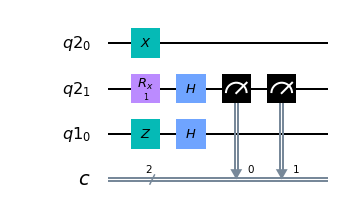

In [14]:
#The indexing method above works for QuantumCircuit objects 
#constructed with or without predefined QuantumRegister objects.

#For circuits with multiple registers, 
#index ordering will correspond to the order registers were added to the circuit, and 
#can be verified by inspecting the circuit’s qubits and clbits properties.
qr1 = QuantumRegister(1, 'q1')
qr2 = QuantumRegister(2, 'q2')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr2, qr1, cr)

print('Qubit ordering:', circuit.qubits)
print('Classical bit ordering:', circuit.clbits)

circuit.x(0)
circuit.rx(1.0,1)
circuit.z(2)
circuit.h([1,2])
circuit.measure(1,[0,1])
circuit.draw(output='mpl')

# Amending Circuit

In [17]:
#We create a circuit
q=QuantumRegister(2,name='q')
c=ClassicalRegister(2,name='c')
qc=QuantumCircuit(q,c,name='qc')

qc.h(q[0])
qc.h(q[1])
qc.measure(q[0],c[0])

#This is a dictionary that holds the instructions
circuit_data=qc.data[1]
print(circuit_data)

(<qiskit.circuit.library.standard_gates.h.HGate object at 0x000001B6075C7640>, [Qubit(QuantumRegister(2, 'q'), 1)], [])


In [18]:
# Manipulation of circuit data
print(qc.qasm()[36:len(qc.qasm())])
del qc.data[1]
print(qc.qasm()[36:len(qc.qasm())])

qreg q[2];
creg c[2];
h q[0];
h q[1];
measure q[0] -> c[0];

qreg q[2];
creg c[2];
h q[0];
measure q[0] -> c[0];



qreg q[2];
creg c[2];
h q[1];
h q[0];
measure q[0] -> c[0];
h q[1];
h q[1];

qreg q[2];
creg c[2];
h q[1];
h q[1];
h q[0];
measure q[0] -> c[0];
h q[1];
h q[1];



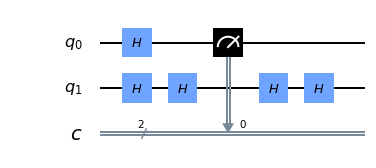

In [20]:
#We add the circuit data to the qasm
qc.data.append(circuit_data)
print(qc.qasm()[36:len(qc.qasm())])
qc.data.insert(0,circuit_data)
print(qc.qasm()[36:len(qc.qasm())])
qc.draw('mpl')

### Completely Arbitrary State

We use the `initialize` function to initialize the three qubit state

$$ \frac{i}{\sqrt{16}} | 000 \rangle + \frac{1}{\sqrt{8}} | 001 \rangle +  \frac{1+i}{\sqrt{16}} | 010 \rangle + \frac{1+2i}{\sqrt{8}} | 101 \rangle + \frac{1}{\sqrt{16}} | 110 \rangle .$$


In [22]:
import math
#For n-qubit, the vector size is 2^n, Hence for 3 qubits the vector size is 8
amplitude_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]

#q = QuantumRegister(3)

#qc = QuantumCircuit(q)

#qc.initialize(amplitude_vector, [q[0],q[1],q[2]])
qc = QuantumCircuit(5,5)
qc.initialize(amplitude_vector, [1,2,3])
qc.measure([1,2,3], [1,2,3])
qc.draw()

»
q_0: ────────────────────────────────────────────────────────────────────────»
     ┌───────────────────────────────────────────────────────────────────┐┌─┐»
q_1: ┤0                                                                  ├┤M├»
     │                                                                   │└╥┘»
q_2: ┤1 initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├─╫─»
     │                                                                   │ ║ »
q_3: ┤2                                                                  ├─╫─»
     └───────────────────────────────────────────────────────────────────┘ ║ »
q_4: ──────────────────────────────────────────────────────────────────────╫─»
                                                                           ║ »
c_0: ══════════════════════════════════════════════════════════════════════╬═»
                                                                           ║ »
c_1: ══════════════════════════════════════════════════════════════════════╩═»
                                                                             »
c_2: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_3: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_4: ════════════════════════════════════════════════════════════════════════»
                                                                             »
«           
«q_0: ──────
«           
«q_1: ──────
«     ┌─┐   
«q_2: ┤M├───
«     └╥┘┌─┐
«q_3: ─╫─┤M├
«      ║ └╥┘
«q_4: ─╫──╫─
«      ║  ║ 
«c_0: ═╬══╬═
«      ║  ║ 
«c_1: ═╬══╬═
«      ║  ║ 
«c_2: ═╩══╬═
«         ║ 
«c_3: ════╩═
«           
«c_4: ══════
«

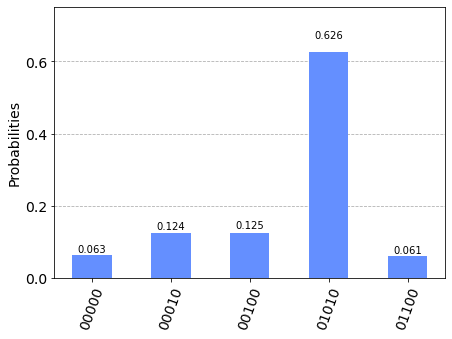

In [23]:
results = execute(qc, backend=q_simulator, shots=2048).result()
plot_histogram(results.get_counts())